# Recurrent Neural Networks (RNN) & Long Short-Term Memory (LSTM)

## Objective
Understand and implement RNNs and LSTMs for sequence modeling tasks such as:
- Sentiment Analysis (Text)
- Time-Series Forecasting

We will cover:
1. Theory of RNNs & LSTMs
2. Preparing sequential data
3. Building RNN & LSTM models in TensorFlow/Keras
4. Evaluating model performance

---

## 1️⃣ Introduction to RNNs

Recurrent Neural Networks (RNNs) are neural networks designed to handle sequential data. Unlike traditional feedforward networks, RNNs have loops, allowing information to persist across time steps.

### Key Points:
- Good for sequential tasks: text, audio, stock prices, time series
- Problems: Vanishing and exploding gradients in long sequences


In [1]:
# Example: simple RNN in TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np

# Sample sequential data
X = np.array([[[i/10]] for i in range(10)])
y = np.array([i/10 for i in range(1, 11)])

# RNN Model
model = Sequential([
    SimpleRNN(10, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
model.fit(X, y, epochs=100, verbose=1)

C:\Users\ksiri\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2024
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.1982
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1940
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1899
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1859
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1818
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1779
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1739
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1701
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1662
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.1625
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1587
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1550
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1514
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 0.1478
Epoch 16/100


## 2️⃣ Limitations of RNNs

- **Vanishing Gradient Problem**: Gradients become too small, model stops learning long dependencies.
- **Exploding Gradient Problem**: Gradients become too large, unstable learning.
- **Solution**: LSTM & GRU

---

## 3️⃣ Introduction to LSTM

Long Short-Term Memory (LSTM) networks are a type of RNN that can learn long-term dependencies.
- Components:
    - **Cell State**: memory
    - **Gates**: Input, Forget, Output
- Handles vanishing gradient problem better than vanilla RNNs


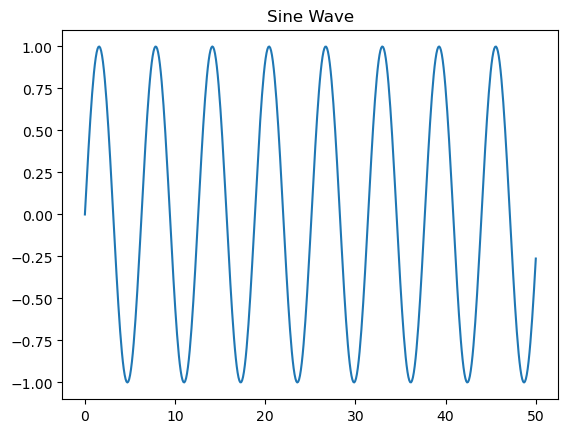

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1696
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0808
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0414
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0061
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.6711e-04
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9259e-04
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6082e-04
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4769e-05
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9076e-05
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.1656e-05
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6093e-05
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6290e-06
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8629e-06
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8m

In [2]:
# LSTM Example: Time Series Forecasting

import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM

# Generate a simple sine wave
t = np.linspace(0, 50, 500)
data = np.sin(t)
plt.plot(t, data)
plt.title('Sine Wave')
plt.show()

# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_seq, y_seq = create_sequences(data, seq_length)

# Reshape for LSTM [samples, timesteps, features]
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

# Build LSTM Model
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()

# Train
history = model_lstm.fit(X_seq, y_seq, epochs=50, batch_size=16, verbose=1)


## 4️⃣ Evaluating LSTM Model

- Plot loss curve
- Predict future values
- Compare predictions vs original sequence


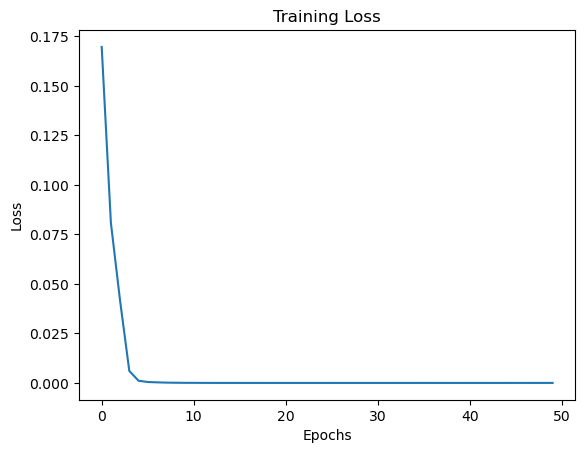

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


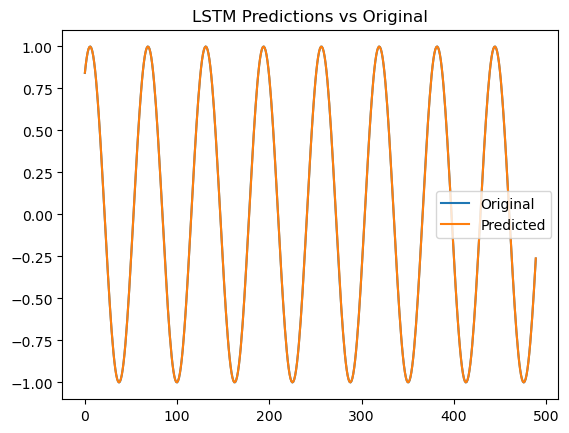

In [3]:
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict
predictions = model_lstm.predict(X_seq)

# Plot original vs predicted
plt.plot(y_seq, label='Original')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Predictions vs Original')
plt.legend()
plt.show()

## 5️⃣ LSTM for Text (Optional: Sentiment Analysis)

- Tokenize text sequences
- Pad sequences
- Build LSTM with Embedding layer
- Train & evaluate on sentiment dataset (IMDB)


In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load IMDB dataset
vocab_size = 10000
max_len = 100
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Build LSTM for text classification
model_text = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_text.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_text.summary()

# Train
history_text = model_text.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\ksiri\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 143ms/step - accuracy: 0.7924 - loss: 0.4336 - val_accuracy: 0.8438 - val_loss: 0.3464
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 148ms/step - accuracy: 0.8909 - loss: 0.2692 - val_accuracy: 0.8372 - val_loss: 0.3757
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 148ms/step - accuracy: 0.9245 - loss: 0.1957 - val_accuracy: 0.8430 - val_loss: 0.3820


## 6️⃣ Summary

- RNNs handle sequential data but struggle with long sequences
- LSTMs solve vanishing gradient problem using gates and cell state
- LSTMs can be applied to:
    - Time series prediction
    - Text sentiment analysis
    - Sequence-to-sequence tasks
- Hands-on practice includes both numerical sequences (sine wave) and text sequences (IMDB)
